<a href="https://colab.research.google.com/github/Chirag3841/Random_Emoji_Generator/blob/main/Random_Emoji_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
EMOJIS = {
    "happy": ["😀", "😃", "😄", "😁", "😆"],
    "sad": ["😢", "😭", "😞", "😔", "😟"],
    "angry": ["😠", "😡", "🤬", "👿", "😤"],
    "surprised": ["😲", "😳", "🤯", "😨", "😱"]
}

In [4]:
def generate_emoji_data(num_samples=1000):
    images = []
    labels = []
    img_size = 64

    for label_idx, (expr, emoji_list) in enumerate(EMOJIS.items()):
        for _ in range(num_samples // len(EMOJIS)):
            # Randomly select an emoji from this category
            emoji_char = random.choice(emoji_list)

            # Create a blank image
            img = np.zeros((img_size, img_size, 3), dtype=np.float32)

            # Add random background color
            bg_color = np.random.uniform(0.1, 0.3, size=3)
            img[:, :] = bg_color

            # Add the emoji (simplified representation)
            center = img_size // 2
            cv2.putText(img, emoji_char, (center-10, center+10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.8,
                       (1.0, 1.0, 1.0), 2, cv2.LINE_AA)

            images.append(img)
            labels.append(label_idx)

    return np.array(images), np.array(labels)

In [5]:
X, y = generate_emoji_data()
X = X / 255.0  # Normalize

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, len(EMOJIS))
y_test = to_categorical(y_test, len(EMOJIS))

In [6]:
def build_emoji_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(len(EMOJIS), activation='softmax')
    ])

    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model

In [ ]:
model = build_emoji_model()
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.2f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
 6/20 ━━━━━━━━━━━━━━━━━━━━ 4s 356ms/step - accuracy: 0.2475 - loss: 1.3862

In [ ]:
def generate_random_emoji(predicted_index):
    expression = list(EMOJIS.keys())[predicted_index]
    emoji_char = random.choice(EMOJIS[expression])

    # Create visualization
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.text(0.5, 0.5, emoji_char, fontsize=60, ha='center', va='center')
    ax.axis('off')
    plt.title(f"Generated {expression} emoji")
    plt.show()
    return emoji_char

In [ ]:
def run_demo():
    while True:
        print("\n1. Generate random emoji")
        print("2. Predict emoji from random sample")
        print("3. Exit")
        choice = input("Choose an option: ")

        if choice == "1":
            # Generate completely random emoji
            expr = random.choice(list(EMOJIS.keys()))
            emoji_char = random.choice(EMOJIS[expr])
            print(f"Random {expr} emoji: {emoji_char}")

            fig, ax = plt.subplots(figsize=(3, 3))
            ax.text(0.5, 0.5, emoji_char, fontsize=60, ha='center', va='center')
            ax.axis('off')
            plt.show()

        elif choice == "2":
            # Use model to predict category and then generate emoji
            random_sample = random.choice(X_test)
            prediction = model.predict(np.expand_dims(random_sample, axis=0))
            predicted_index = np.argmax(prediction)
            generate_random_emoji(predicted_index)

        elif choice == "3":
            print("THE END")
            break

        else:
            print("Invalid choice")


1. Generate random emoji
2. Predict emoji from random sample
3. Exit


Choose an option:  2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


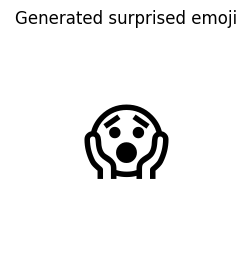


1. Generate random emoji
2. Predict emoji from random sample
3. Exit


Choose an option:  1


Random surprised emoji: 😳


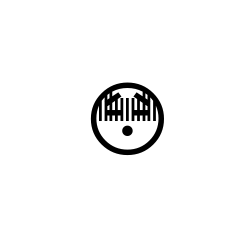


1. Generate random emoji
2. Predict emoji from random sample
3. Exit


In [ ]:
run_demo()